# statsmodels
* http://www.statsmodels.org/stable/index.html
* Main Features: https://github.com/statsmodels/statsmodels/?tab=readme-ov-file#main-features


## User Guide
* https://www.statsmodels.org/stable/user-guide.html
* examples: https://www.statsmodels.org/stable/examples/index.html
  * https://github.com/statsmodels/statsmodels/tree/main/examples/notebooks

Topics:
* Regression and Linear Models
* Time Series Analysis
* Other Models
* Statistics and Tools
* Data Sets

In [2]:
!pip install statsmodels

In [ ]:
# cleanup
!pip uninstall statsmodels -y

In [7]:
# Cross-sectional models and methods
import statsmodels.api as sm
# Time-series models and methods
import statsmodels.tsa.api as tsa
# A convenience interface for specifying models using formula strings and DataFrames
import statsmodels.formula.api as smf

# from statsmodels.stats import power

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

# Formula

The `patsy` module provides a convenient function to prepare design matrices using `R`-like formulas. You can find more information [here](https://patsy.readthedocs.io/en/latest/).


R Formula: [An Introduction to R > 11.1 Defining statistical models; formulae](https://cran.r-project.org/doc/manuals/R-intro.html#Formulae-for-statistical-models)

patsy's [Handling categorical data](https://patsy.readthedocs.io/en/latest/API-reference.html#handling-categorical-data)



# ANOVA

## Examples in 'Practical Statistics for Data Scientists'

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/four_sessions.csv')
data.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


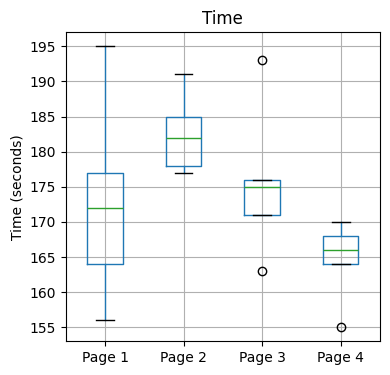

In [14]:
ax = data.boxplot(by='Page', column='Time', figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (seconds)')
plt.suptitle('')
plt.tight_layout()
plt.show()

In [16]:
model = smf.ols('Time ~ Page', data=data).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


In [22]:
# two-way ANOVA: https://www.statsmodels.org/stable/anova.html

data = sm.datasets.get_rdataset("Moore", "carData", cache=True).data
data = data.rename(columns={"partner.status": "partner_status"}) # make name pythonic
print(data.head())

# 集合值处理
# https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.Sum
formula = 'conformity ~ C(fcategory, Sum)*C(partner_status, Sum)'

model = smf.ols(formula=formula, data=data).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

  partner_status  conformity fcategory  fscore
0            low           8       low      37
1            low           4      high      57
2            low           8      high      65
3            low           7       low      20
4            low          10       low      36


,sum_sq,df,F,PR(>F)
"C(fcategory, Sum)",11.614700,2.0,0.276958,0.759564
"C(partner_status, Sum)",212.213778,1.0,10.120692,0.002874
"C(fcategory, Sum):C(partner_status, Sum)",175.488928,2.0,4.184623,0.022572
Residual,817.763961,39.0,NaN,NaN
